## <font color='black'>Exploration of NHS cancer incidence data</font>

In [9]:
library(tidyverse)
library(janitor)

This report focuses on analysis of two datasets: Incidence at Scotland Level and Incidence by Health Board. Together these datasets provide a detailed insight into incidence of cancer in the Borders Health Board. I have taken Public Health Scotland's definition of incidence as the total number of new cases of cancer diagnosed in Scotland during the given period.

I have removed duplicated data from this set of graphs, removing the rows splitting data by sex and removing any rows grouping a particular cancer site. 

In [2]:
# reading in data 
whole_scotland_data <- read_csv("cancer_incidence_data_scotland") %>% 
  clean_names() %>%
  # removed as no unique values 
  select(-country)
healthboard_data <- read_csv("cancer_incidence_by_healthboard") %>% 
  clean_names() %>% 
  # filtering to focus on Borders' health board  
  filter(hbr == "S08000016")

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character(),
  CancerSiteICD10Code = col_character(),
  CancerSite = col_character(),
  Sex = col_character(),
  SexQF = col_character(),
  EASRLower95pcConfidenceIntervalQF = col_character(),
  EASRUpper95pcConfidenceIntervalQF = col_character(),
  WASRLower95pcConfidenceIntervalQF = col_character(),
  WASRUpper95pcConfidenceIntervalQF = col_character(),
  StandardisedIncidenceRatioQF = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  HBR = col_character(),
  CancerSiteICD10Code = col_character(),
  CancerSite = col_character(),
  Sex = col_character(),
  SexQF = col_character(),
  EASRLower95pcConfidenceIntervalQF = col_character(),
  EASRUpper95pcConfidenceIntervalQF = col_character(),
  WASRLower95pcConfidenceIntervalQF = col_character(),
  WASRUpper95pcConfidenceIntervalQF = col_character()
)
See spec(...) for full c

In [3]:
# overwriting and removing duplicated data
healthboard_data <- healthboard_data %>% 
 filter(cancer_site != "All cancer types" & cancer_site != "Leukaemias"& cancer_site != "All brain and CNS tumours (malignant and non-malignant)") %>% 
  filter(sex == "All")

whole_scotland_data <- whole_scotland_data %>% 
 filter(cancer_site != "All cancer types" & cancer_site != "Leukaemias"& cancer_site != "All brain and CNS tumours (malignant and non-malignant)") %>% 
  filter(sex == "All")

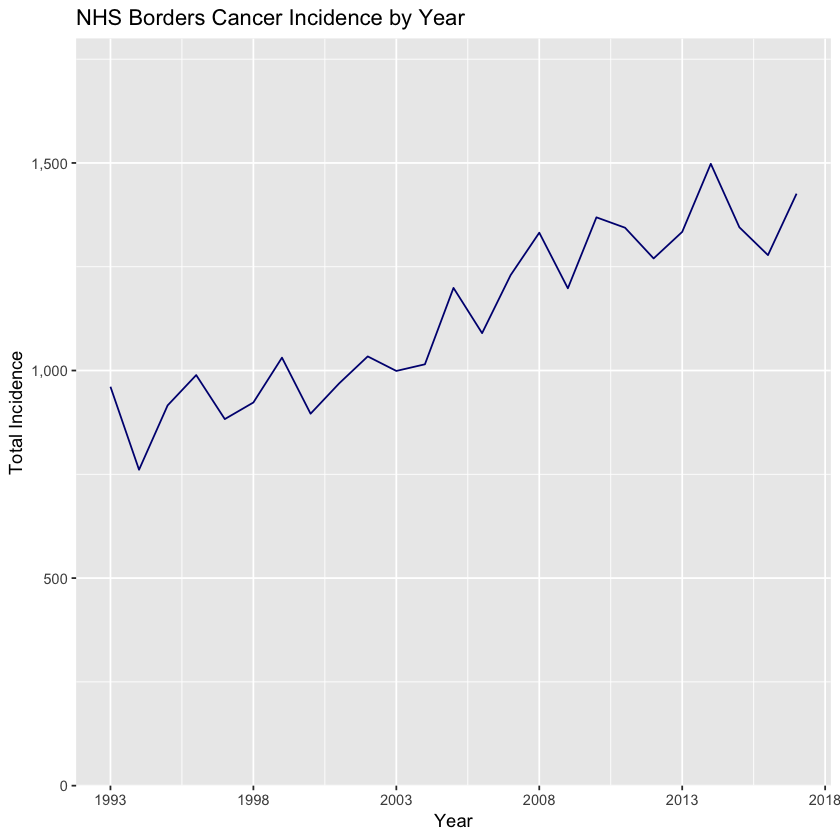

In [4]:
cancer_total_by_year <- healthboard_data %>% 
  group_by(year) %>% 
  summarise(number = sum(incidences_all_ages)) %>% 
  ggplot() + 
  geom_line(aes(x = year, y = number), col = "navy") +
  labs(
    title = "NHS Borders Cancer Incidence by Year",
    x = "Year",
    y = "Total Incidence"
  ) +
  # manually altered scale on x axis to include more years and make the starting and end dates clear
  scale_x_continuous(breaks = c(1993, 1998, 2003, 2008, 2013, 2018)) +
  # added commas to make the large numbers more readable, had to also expand the axis to fit this in 
  scale_y_continuous(labels = scales::comma, expand = c(0, 0), limits = c(0, 1800))

cancer_total_by_year

This demonstrates that there has been a general upwards trend in cancer incidence between 1993 and 2017. This is line with the NHS Borders' clinical strategy which notes that cancer incidence is increasing as a result of an ageing population in addition to diagnosis improvements.

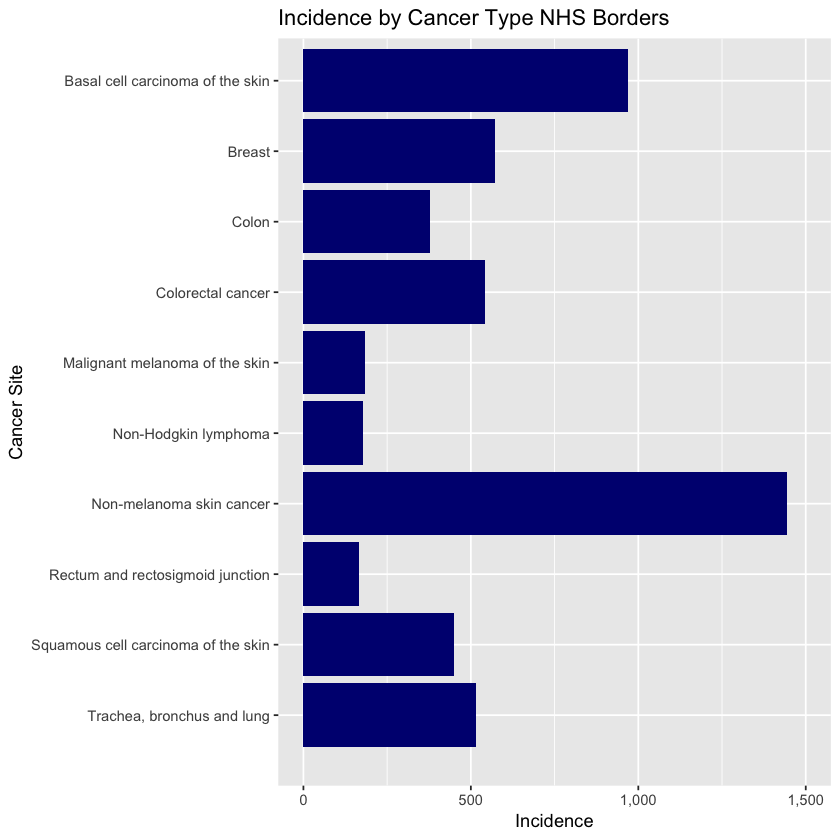

In [5]:
ten_cancers_with_highest_incidence <- healthboard_data %>% 
  group_by(cancer_site) %>% 
  # filtered for most recent years 
  filter(year > 2012) %>% 
  summarise(number = sum(incidences_all_ages)) %>%
  arrange(desc(number)) %>% 
  head(10) %>% 
  # factored the data points to make them alphabetical
  mutate(cancer_site = factor(cancer_site), cancer_site = factor(cancer_site, levels = rev(levels(cancer_site)))) %>%   ggplot() + 
  geom_col(aes(x = cancer_site, y = number), fill = "navy") +
 # flipped the graph so that the names are readable 
  coord_flip() +
  labs(title = "Incidence by Cancer Type NHS Borders",
       y = "Incidence",
       x = "Cancer Site") +
  scale_y_continuous(labels = scales::comma) + 
  # expanding y axis limit to fit labels with commas in 
  expand_limits(x = 0, y = 1500) 
  
ten_cancers_with_highest_incidence

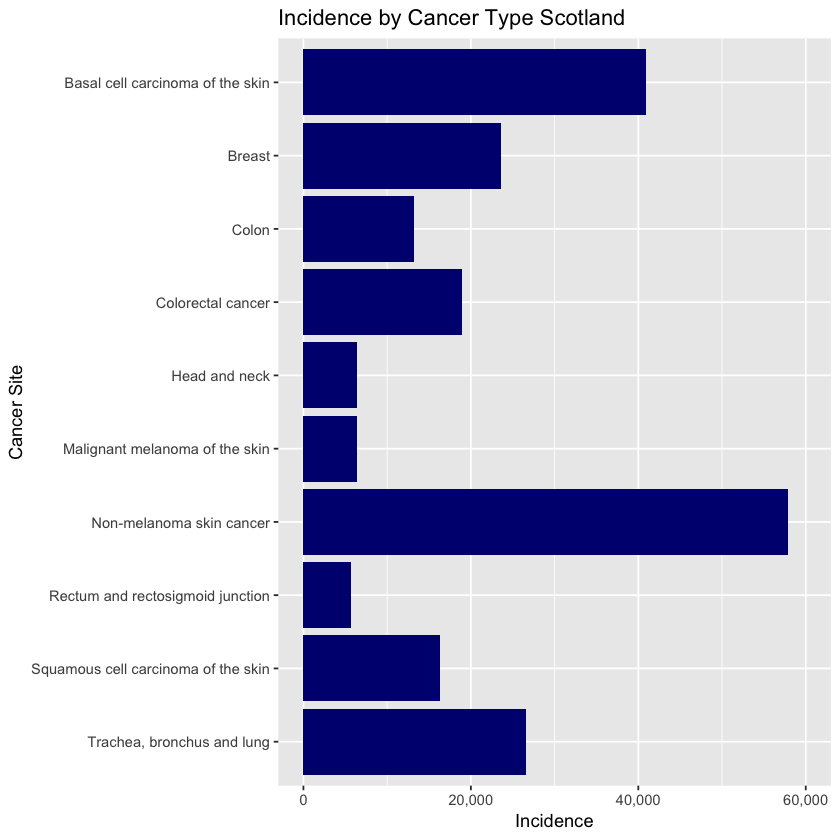

In [6]:
ten_cancers_with_highest_incidence_scotland <- whole_scotland_data %>% 
  filter(year > 2012) %>% 
  filter(sex != "Male", sex != "Female") %>% 
  group_by(cancer_site) %>% 
  summarise(number = sum(incidences_all_ages)) %>%
  arrange(desc(number)) %>% 
  head(10) %>% 
  mutate(cancer_site = factor(cancer_site), cancer_site = factor(cancer_site, levels = rev(levels(cancer_site)))) %>%
  ggplot() + 
  geom_col(aes(x = cancer_site, y = number), fill = "navy") +
  coord_flip() +
  labs(title = "Incidence by Cancer Type Scotland",
       y = "Incidence",
       x = "Cancer Site") +
  scale_y_continuous(labels = scales::comma) +
  expand_limits(y = 60000)
ten_cancers_with_highest_incidence_scotland

In [ ]:
These are the ten areas that have the highest incidence levels in NHS Borders from 2013 - 2017. The most recent five years of available data have been selected to look at the most relevant information. This is generally reflective of the incidence levels in Scotland as a whole. However, while Non-Hodgkin lymphoma features in NHS Borders' ten highest incidence cancers, Scotland as a whole has head and neck instead. 

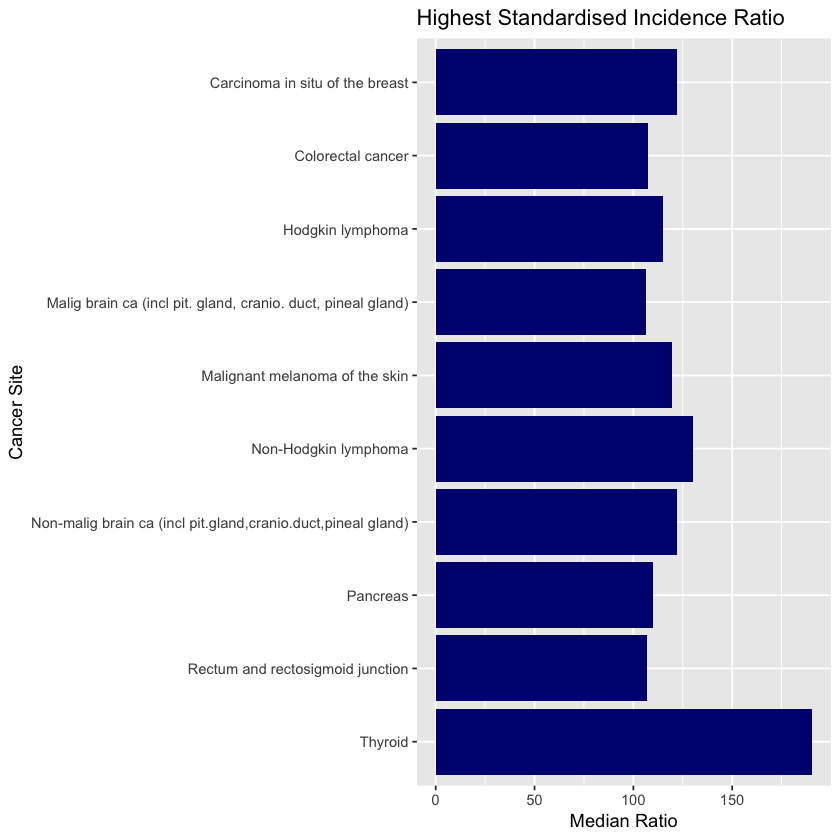

In [7]:
standardised_incidence_ratio_highest <- healthboard_data %>% 
  select(standardised_incidence_ratio, year, cancer_site, sex) %>% 
  filter(year > 2012)  %>% 
  group_by(cancer_site) %>% 
  summarise(median = median(standardised_incidence_ratio)) %>% 
  arrange(desc(median)) %>% 
  head(10) %>% 
  mutate(cancer_site = factor(cancer_site), cancer_site = factor(cancer_site, levels = rev(levels(cancer_site)))) %>%
  ggplot() +
  geom_col(aes(x = cancer_site, y = median), fill = "navy") +
  coord_flip() +
  labs(
    title = "Highest Standardised Incidence Ratio", 
    x = "Cancer Site",
    y = "Median Ratio"
  )
standardised_incidence_ratio_highest

This shows the cancers with the ten highest standardised incidence ratios - these are the cancers which have been newly diagnosed at a greater rate than had been estimated.   


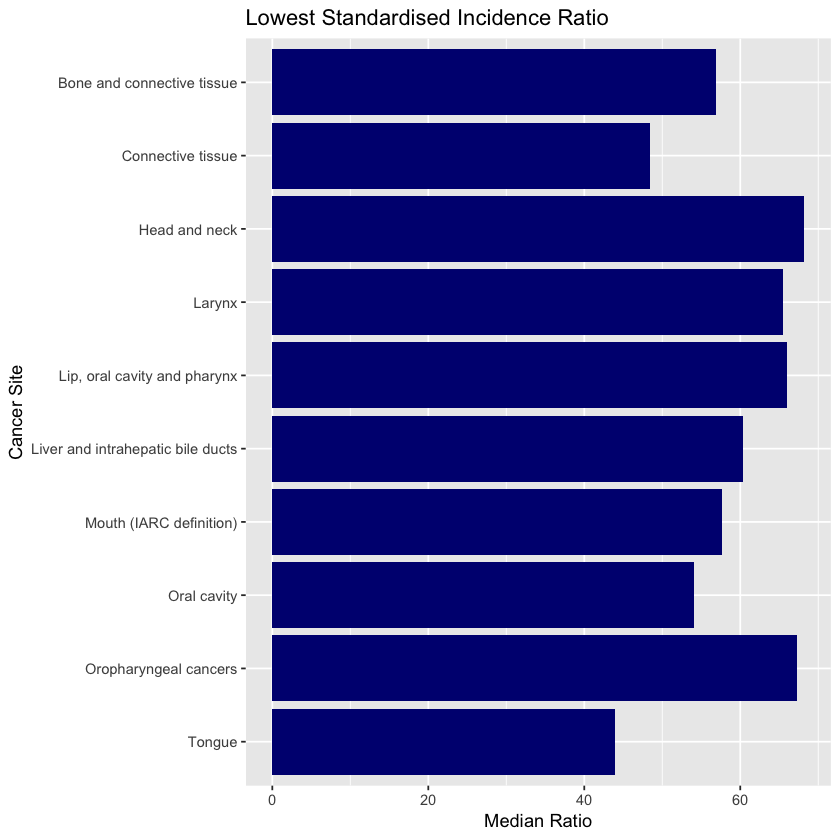

In [8]:
standardised_incidence_ratio_lowest <- healthboard_data %>% 
  select(standardised_incidence_ratio, year, cancer_site, sex) %>% 
  filter(year > 2012) %>% 
  group_by(cancer_site) %>% 
  summarise(median = median(standardised_incidence_ratio)) %>% 
  arrange(median) %>% 
  head(10) %>% 
  mutate(cancer_site = factor(cancer_site), cancer_site = factor(cancer_site, levels = rev(levels(cancer_site)))) %>%
  ggplot() +
  geom_col(aes(x = cancer_site, y = median), fill = "navy") +
  coord_flip() +
  labs(
    title = "Lowest Standardised Incidence Ratio",
    x = "Cancer Site",
    y = "Median Ratio"
  )
standardised_incidence_ratio_lowest


This shows the cancers with the ten lowest standardised incidence ratios - these are the cancers which have been newly diagnosed at a lesser rate than had been estimated. 